IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

DATASET IMPORT

In [4]:
df = pd.read_csv('/content/Cleaned_data (1).csv')



SELECTING ONLY TWO COLUMNS DATE AND TEMPRATURE

In [5]:
df=df[['Date','T2M']]

df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

SPLING TRAIN AND TEST DATA

In [6]:
train = df.loc[df.index < '26-11-2022']
test = df.loc[df.index >= '26-11-2022']


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:48: UserWarning: Parsing '26-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:60: UserWarning: Parsing '26-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ge)


PLOTTING TRAIN AND TEST DATA

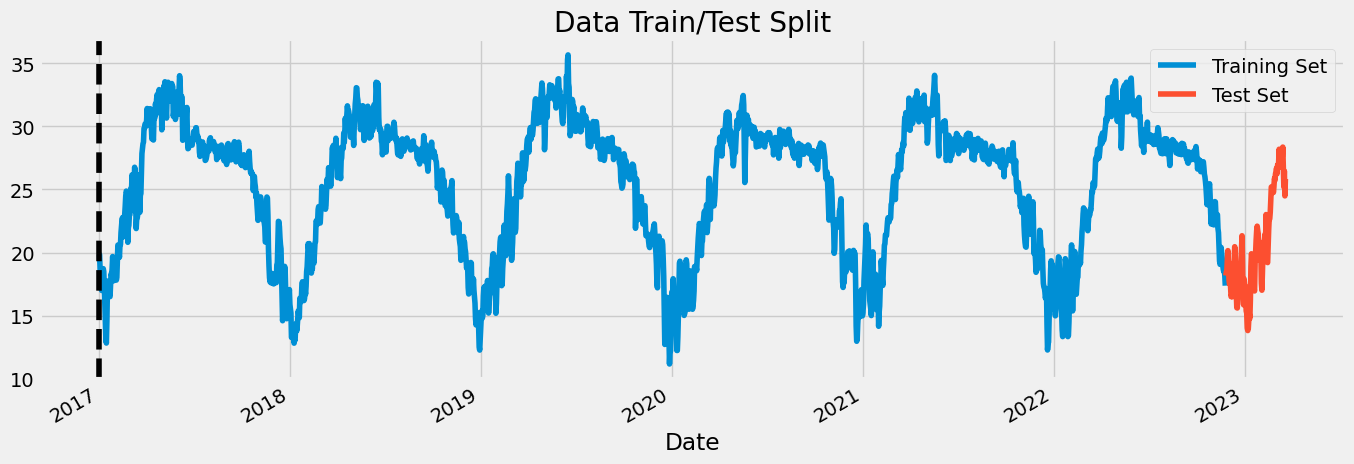

In [7]:

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

CRATING MORE FEATURE FROM EXISTING FEATURES

In [8]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)


CREATING TRAIN TEST SPLIT

In [9]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'T2M'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [10]:
y_test1 = y_test.to_numpy()

In [11]:
y_test1

array([18.17, 18.48, 18.55, 19.55, 20.15, 19.21, 17.89, 17.51, 17.56,
       17.36, 16.51, 16.62, 16.48, 17.29, 18.23, 19.19, 19.31, 20.46,
       19.88, 18.43, 16.85, 15.62, 15.6 , 17.42, 18.01, 17.32, 17.94,
       18.79, 19.05, 19.26, 20.25, 21.33, 19.13, 16.4 , 15.85, 17.9 ,
       17.4 , 17.36, 16.29, 15.37, 15.19, 14.01, 13.81, 13.96, 14.69,
       15.14, 14.78, 16.25, 18.87, 19.9 , 19.72, 17.76, 17.69, 17.87,
       17.13, 16.95, 19.14, 20.  , 20.99, 21.73, 22.09, 21.75, 21.49,
       20.41, 19.4 , 19.45, 19.42, 20.05, 17.57, 17.01, 18.33, 19.93,
       20.83, 20.88, 20.99, 21.45, 20.93, 23.01, 21.73, 19.24, 19.2 ,
       20.54, 21.8 , 22.69, 22.66, 23.19, 24.14, 25.19, 25.2 , 24.94,
       25.25, 24.76, 25.2 , 25.88, 25.73, 26.23, 26.42, 26.69, 26.25,
       26.94, 26.83, 27.16, 28.19, 26.78, 27.76, 28.04, 28.11, 28.03,
       27.57, 28.36, 26.8 , 25.2 , 26.46, 24.49, 25.83])

XGB REGRESSOR 

In [12]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)


[17:42:21] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:25.33944	validation_1-rmse:20.26048
[100]	validation_0-rmse:9.43291	validation_1-rmse:8.34984
[200]	validation_0-rmse:3.70738	validation_1-rmse:4.44163
[300]	validation_0-rmse:1.82698	validation_1-rmse:3.14444
[400]	validation_0-rmse:1.34237	validation_1-rmse:2.88463
[500]	validation_0-rmse:1.22001	validation_1-rmse:2.75464
[600]	validation_0-rmse:1.17126	validation_1-rmse:2.70062
[700]	validation_0-rmse:1.13793	validation_1-rmse:2.67452
[766]	validation_0-rmse:1.12155	validation_1-rmse:2.68697


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

PLOTTING THE PREDICTION

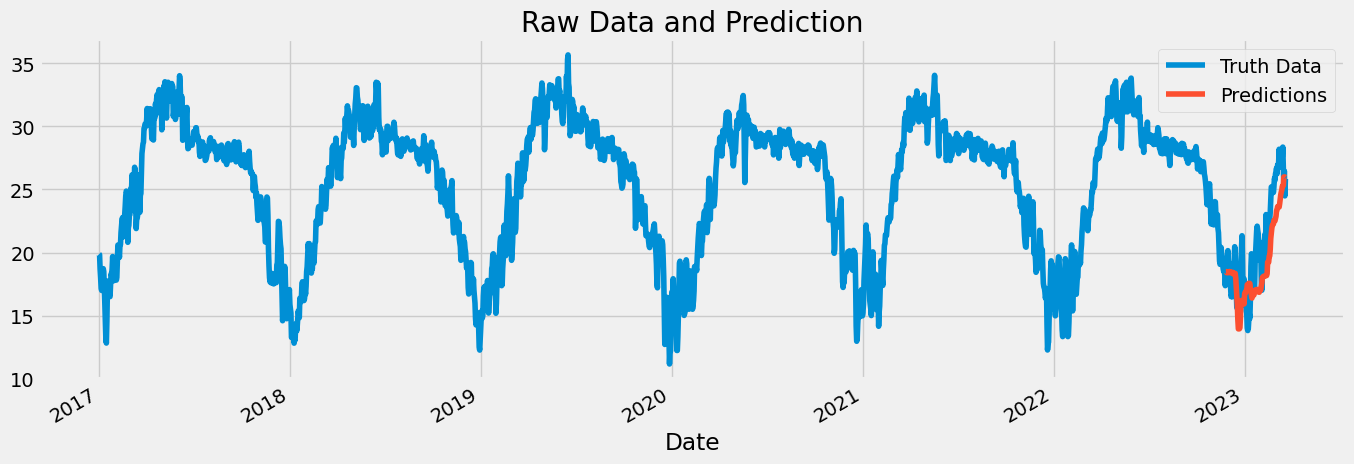

In [13]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['T2M']].plot(figsize=(15, 5))
df[['prediction']].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [14]:

y_pred=test['prediction'].to_numpy()

PREDICTION 

In [15]:
y_pred

array([18.488127, 18.488127, 18.397173, 18.397173, 18.402964, 18.402964,
       18.48937 , 18.488127, 18.488127, 18.397173, 18.397173, 18.402964,
       18.402964, 18.431913, 18.30939 , 18.30939 , 18.339716, 18.339716,
       18.345507, 17.964663, 17.279684, 16.527073, 15.875508, 14.67648 ,
       13.941625, 13.947415, 13.947415, 14.033821, 14.844815, 16.155725,
       16.18606 , 16.205242, 16.200867, 16.200867, 16.095217, 15.921884,
       16.735106, 16.837605, 16.837605, 16.974854, 16.974854, 17.448782,
       17.457104, 17.457104, 17.559603, 17.559603, 17.546421, 17.136364,
       16.886528, 16.583576, 16.384472, 16.600882, 16.600882, 16.600882,
       16.65153 , 16.980242, 16.970503, 16.970503, 17.067263, 17.067263,
       17.067263, 17.067263, 16.936764, 16.849674, 16.849674, 17.001713,
       17.001713, 17.085499, 17.394361, 17.581945, 18.023111, 18.04875 ,
       18.112959, 18.112959, 18.122599, 18.140478, 18.172878, 18.172878,
       18.172878, 18.327875, 19.239485, 19.239485, 

MSE CALCULATION

In [16]:
from sklearn.metrics import mean_squared_error as MSE
np.sqrt((MSE(y_test1, y_pred))/len(y_test1))

0.24876246494511056

In [17]:
z = np.array([1,0])
d = np.array([0,1])
(MSE(z,d))

1.0